In [16]:
# https://www.kaggle.com/code/salimhammadi07/esc-50-environmental-sound-classification#A.-Exploring-the-Audio-Data

# https://www.kaggle.com/code/doofensmirtz/85-validation-accuracy-tensorflow

# https://www.kaggle.com/datasets/mmoreaux/environmental-sound-classification-50/code

# https://github.com/YuanGongND/ast/tree/master

# https://github.com/karolpiczak/ESC-50?tab=readme-ov-file

# dataset - https://github.com/karoldvl/ESC-50/archive/master.zip

In [1]:
# import numpy for math calculations
import numpy as np

# import pandas for data (csv) manipulation
import pandas as pd

# import gc to collect garbage
import gc

# import matplotlib for plotting
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('fivethirtyeight') 
%matplotlib inline

# import seaborn for more plotting options(built on top of matplotlib)

# import librosa for analysing audio signals : visualize audio, display the spectogram
import librosa
import soundfile as sf

# import librosa for analysing audio signals : visualize audio, display the spectogram
import librosa.display
# import wav for reading and writing wav files
import wave

# import IPython.dispaly for playing audio in Jupter notebook
import IPython.display as ipd

# import os for system operations
import os

# import random for get random values/choices
import random

from utils import DEVICE

# Import PyTorch libraries
import torch
import torchvision
import torchvision.transforms as transforms

import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from pathlib import Path
import torchaudio
print("Libraries imported - ready to use PyTorch", torch.__version__)

# import tqdm to show a smart progress meter
from tqdm.notebook import trange,tqdm

# import warnings to hide the unnessairy warniings
import warnings
warnings.filterwarnings('ignore')


Libraries imported - ready to use PyTorch 2.0.0+cu117


# read files

In [2]:
basic_path = Path(os.getcwd()).parent.parent
audio_folder = os.path.join(basic_path,"datasets/ESC-50-master/audio")
meta_data_file = os.path.join(basic_path,"datasets/ESC-50-master/meta",'esc50.csv')

In [3]:
# To get a list of the pathes of all the audio files

dataset = pd.read_csv(meta_data_file)
all_files = []
for path, subdirs, files in os.walk(audio_folder):
    for name in files:
        all_files.append(os.path.join(path, name))
        
# A dictionary to decode the categories into targets
decoder = {0: 'dog', 14: 'chirping_birds', 36: 'vacuum_cleaner', 19: 'thunderstorm', 30: 'door_wood_knock',34: 'can_opening', 9: 'crow', 22: 'clapping', 48: 'fireworks', 41: 'chainsaw', 47: 'airplane', 31: 'mouse_click', 17: 'pouring_water', 45: 'train', 8: 'sheep', 15: 'water_drops', 46: 'church_bells', 37: 'clock_alarm', 32: 'keyboard_typing', 16: 'wind', 25: 'footsteps', 4: 'frog', 3: 'cow', 27: 'brushing_teeth', 43: 'car_horn', 12: 'crackling_fire', 40: 'helicopter', 29: 'drinking_sipping', 10: 'rain', 7: 'insects', 26: 'laughing', 6: 'hen', 44: 'engine', 23: 'breathing', 20: 'crying_baby', 49: 'hand_saw', 24: 'coughing', 39: 'glass_breaking', 28: 'snoring', 18: 'toilet_flush', 2: 'pig', 35: 'washing_machine', 38: 'clock_tick', 21: 'sneezing', 1: 'rooster', 11: 'sea_waves', 42: 'siren', 5: 'cat', 33: 'door_wood_creaks', 13: 'crickets'}

# A dictionary to encode the categories into targets
encoder = {'dog': 0, 'chirping_birds': 14, 'vacuum_cleaner': 36, 'thunderstorm': 19, 'door_wood_knock': 30, 'can_opening': 34, 'crow': 9, 'clapping': 22, 'fireworks': 48, 'chainsaw': 41, 'airplane': 47, 'mouse_click': 31, 'pouring_water': 17, 'train': 45, 'sheep': 8, 'water_drops': 15, 'church_bells': 46, 'clock_alarm': 37, 'keyboard_typing': 32, 'wind': 16, 'footsteps': 25, 'frog': 4, 'cow': 3, 'brushing_teeth': 27, 'car_horn': 43, 'crackling_fire': 12, 'helicopter': 40, 'drinking_sipping': 29, 'rain': 10, 'insects': 7, 'laughing': 26, 'hen': 6, 'engine': 44, 'breathing': 23, 'crying_baby': 20, 'hand_saw': 49, 'coughing': 24, 'glass_breaking': 39, 'snoring': 28, 'toilet_flush': 18, 'pig': 2, 'washing_machine': 35, 'clock_tick': 38, 'sneezing': 21, 'rooster': 1, 'sea_waves': 11, 'siren': 42, 'cat': 5, 'door_wood_creaks': 33, 'crickets': 13}

In [4]:
number_of_labels = dataset.target.nunique()

# importing one wav

In [21]:
# Importing 1 file
y, sr = librosa.load(os.path.join(audio_folder,"1-100032-A-0.wav"))

print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')

# The duration is equal to the number of frames divided by the framerate
print('Duration of the audio file:', np.shape(y)[0]/sr, 'second')

audio_voice, sample_rate = torchaudio.load(os.path.join(audio_folder,"1-100032-A-0.wav"))


y: [0. 0. 0. ... 0. 0. 0.] 

y shape: (110250,) 

Sample Rate (KHz): 22050 

Duration of the audio file: 5.0 second


In [22]:
audio_voice
sample_rate

44100

In [23]:
# # affect of resampling
# from IPython.display import Audio
# data_tensor, rate = torchaudio.load(os.path.join(audio_folder,"1-100032-A-0.wav"))
# wav_to_vec_rate = 16000
# transform = torchaudio.transforms.Resample(orig_freq=rate, new_freq=wav_to_vec_rate)
# resampled_data_tensor = transform(data_tensor)
# Audio(resampled_data_tensor.numpy(), rate=wav_to_vec_rate)

# waveform

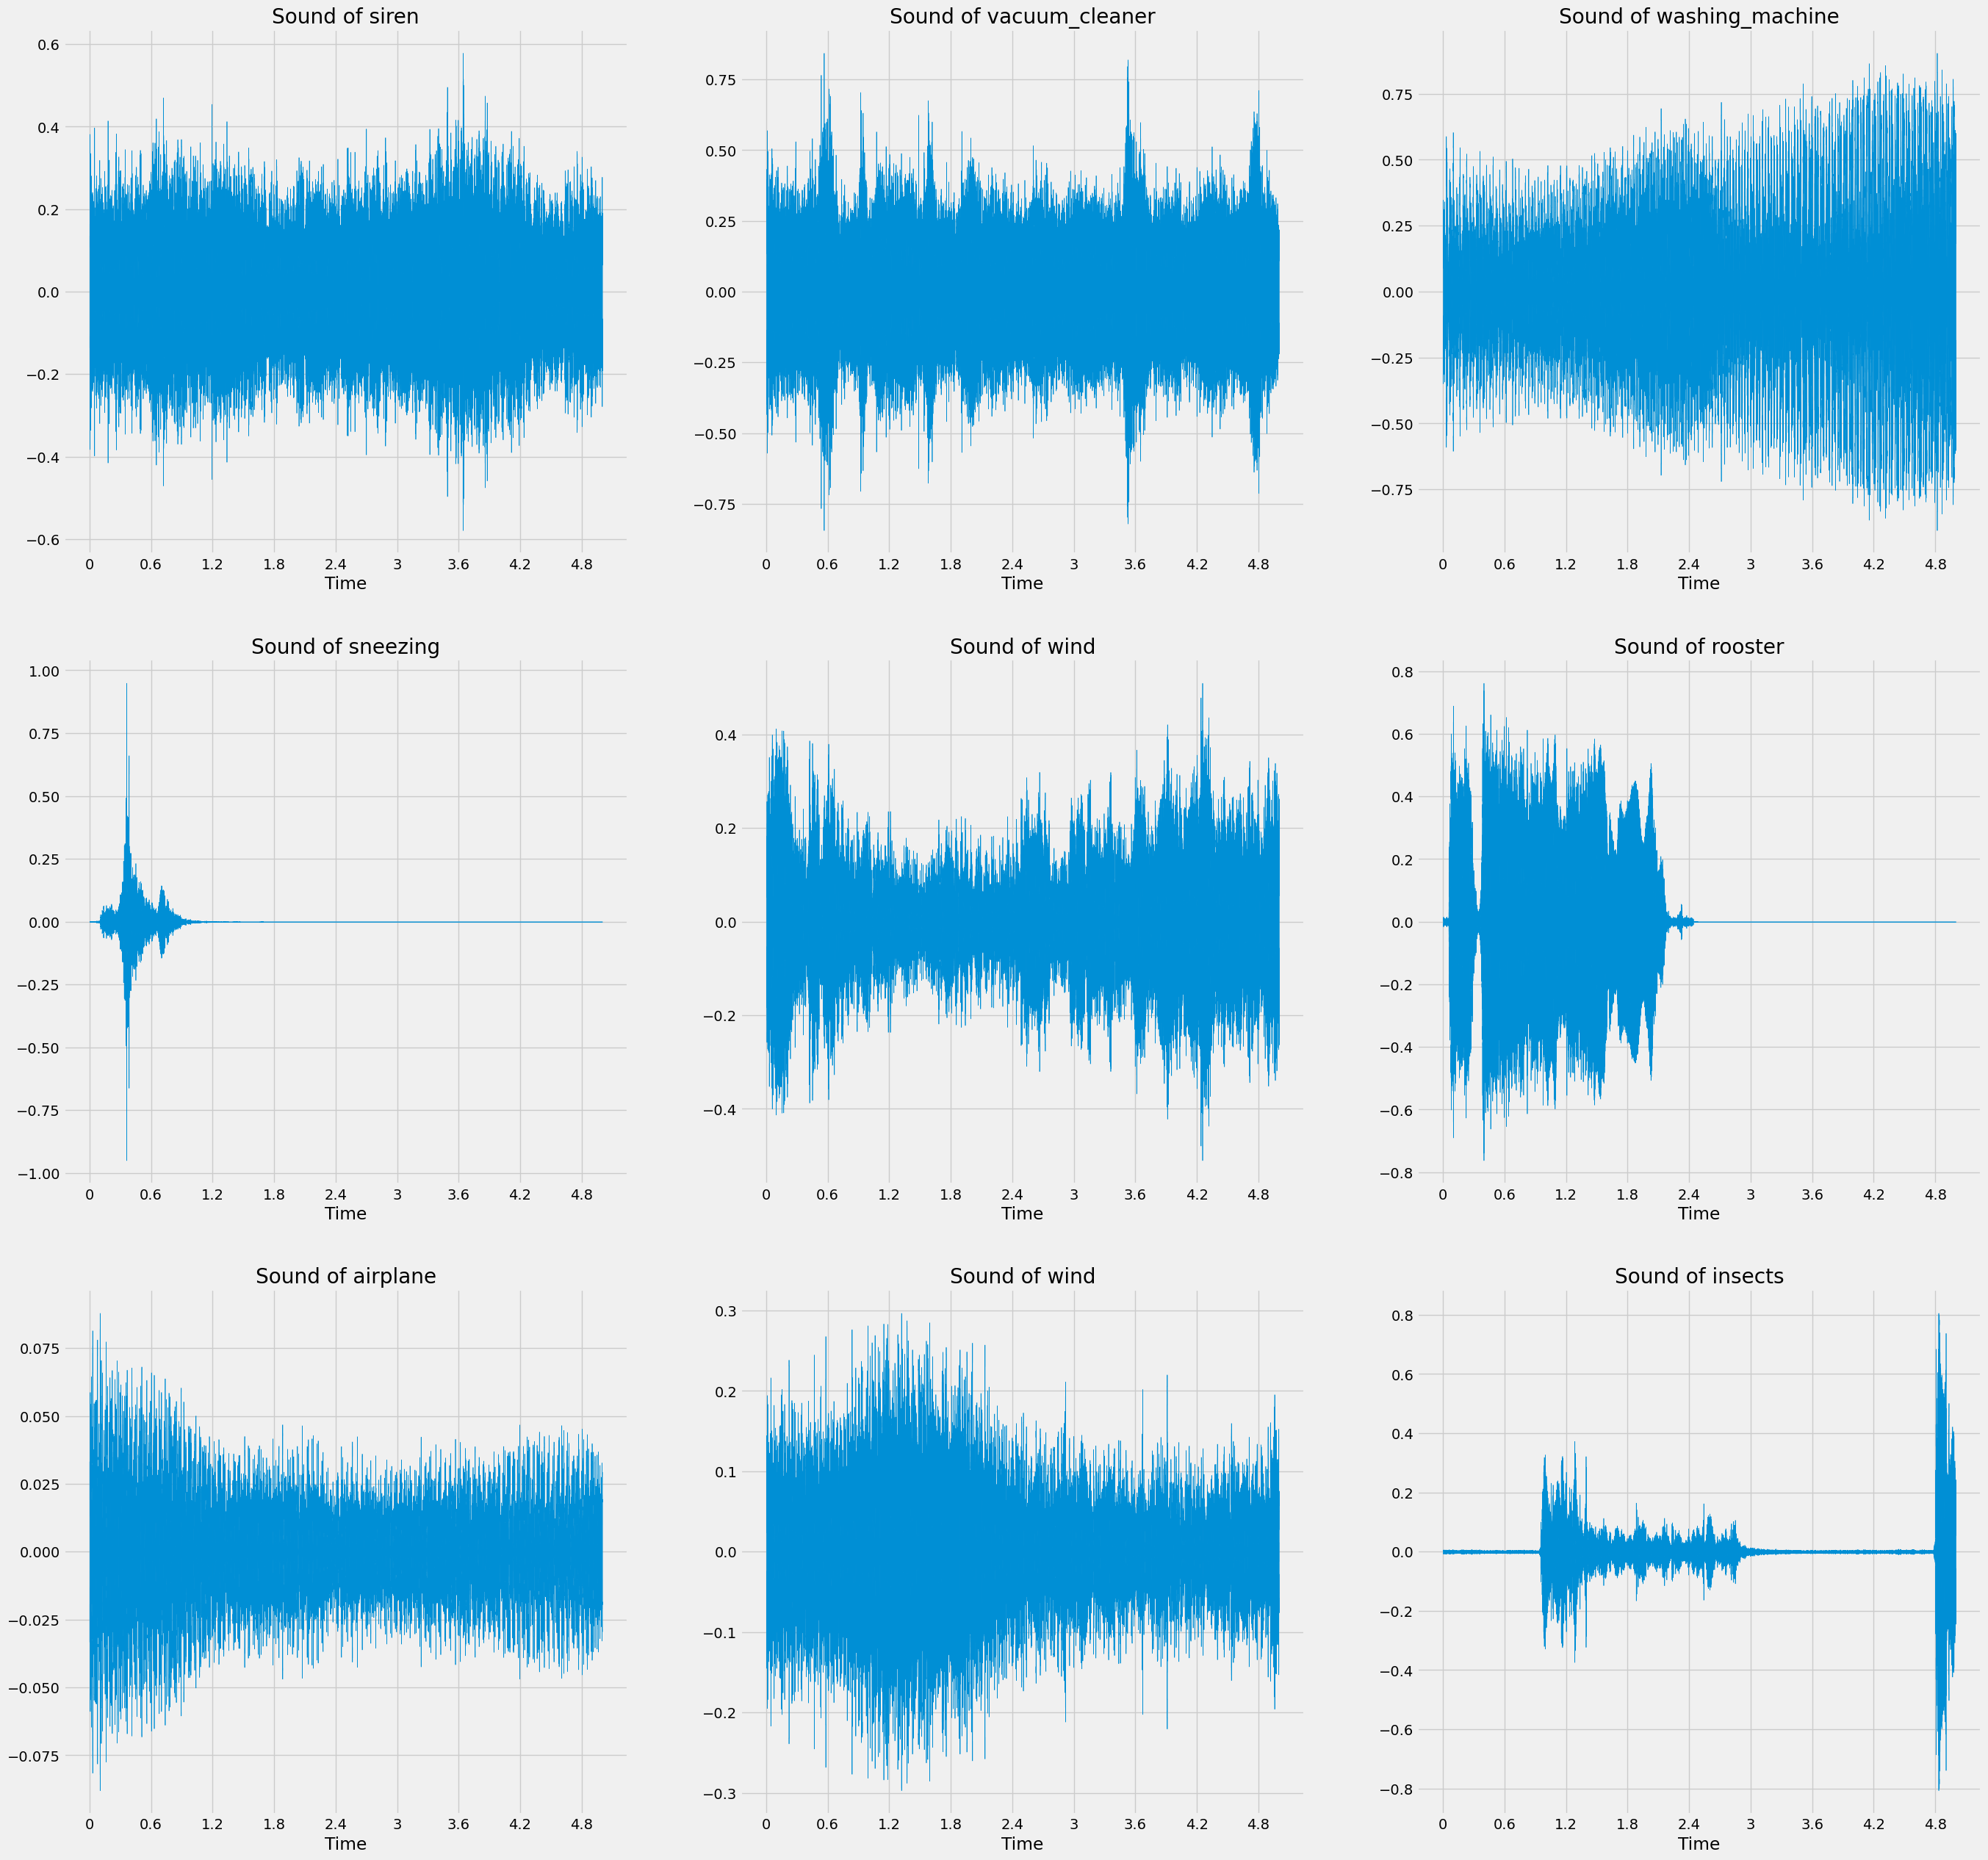

In [24]:
plot_files = random.choices(all_files, k = 10)
plot_audios = [librosa.load(plot_files[i]) for i in range(10)]
plt.figure(figsize=(30,30))
for i in range(1,10):
    plt.subplot(3,3,i)
    librosa.display.waveshow(plot_audios[i][0])
    try:
        plt.title("Sound of " + decoder[int(plot_files[i][-6:-4])] )
    except:
        plt.title("Sound of " + decoder[int(plot_files[i][-5:-4])] )

# category amounts
### in order to set train, val, test

In [25]:
dataset.head()

,filename,fold,target,category,esc10,src_file,take
0,1-100032-A-0.wav,1,0,dog,True,100032,A
1,1-100038-A-14.wav,1,14,chirping_birds,False,100038,A
2,1-100210-A-36.wav,1,36,vacuum_cleaner,False,100210,A
3,1-100210-B-36.wav,1,36,vacuum_cleaner,False,100210,B
4,1-101296-A-19.wav,1,19,thunderstorm,False,101296,A


In [26]:
dataset.groupby(['fold','category'])['filename'].nunique()

fold  category       
1     airplane           8
      breathing          8
      brushing_teeth     8
      can_opening        8
      car_horn           8
                        ..
5     train              8
      vacuum_cleaner     8
      washing_machine    8
      water_drops        8
      wind               8
Name: filename, Length: 250, dtype: int64

## check that all tensors have the same rate and shape

In [27]:
audio_tensors, rates = [],[]
for filename in all_files:
    data_tensor, rate = torchaudio.load(filename)
    audio_tensors.append(data_tensor.shape[1])
    rates.append(rate)
    
print(np.histogram(np.array(rates)))
np.histogram(np.array(audio_tensors))


(array([   0,    0,    0,    0,    0, 2000,    0,    0,    0,    0]), array([44099.5, 44099.6, 44099.7, 44099.8, 44099.9, 44100. , 44100.1,
       44100.2, 44100.3, 44100.4, 44100.5]))


(array([   0,    0,    0,    0,    0, 2000,    0,    0,    0,    0]),
 array([220499.5, 220499.6, 220499.7, 220499.8, 220499.9, 220500. ,
        220500.1, 220500.2, 220500.3, 220500.4, 220500.5]))

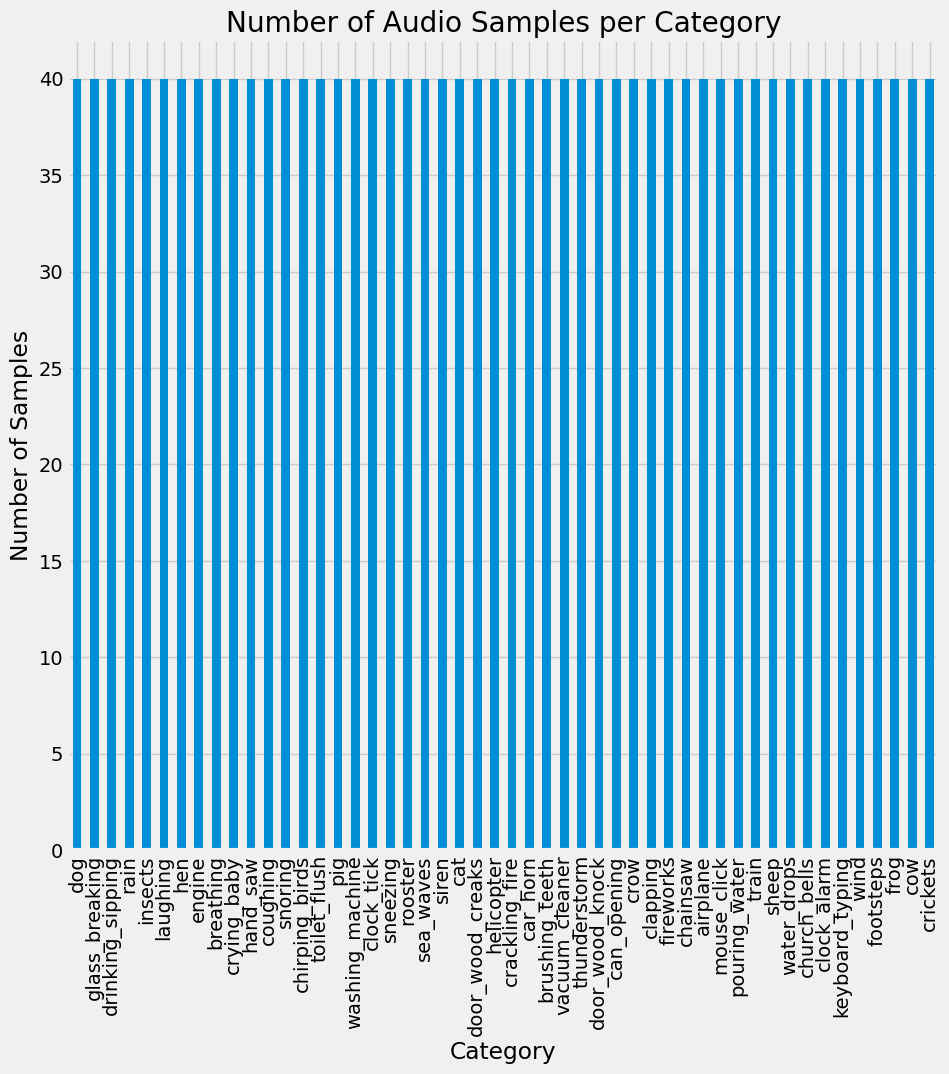

In [28]:
category_group = dataset['category'].value_counts()
plot = category_group.plot(kind='bar', title="Number of Audio Samples per Category", figsize=(10,10))
plot.set_xlabel("Category")
plot.set_ylabel("Number of Samples");

In [31]:
# for data, target in train_loader:
#         data, target = data.to(device), target.to(device)
#         break

In [32]:
# # 5 / 16
# time_of_mesuare = 1/44.1 #every y [ms]
# amount_of_times = 5/time_of_mesuare
# # 5 sec -> 22.05khz -> 

In [33]:
#data augmentations for speech if needed
# def add_noise(data):
#     noise = np.random.normal(0, 0.1, len(data))
#     audio_noisy = data + noise
#     return audio_noisy
    
# def pitch_shifting(data):
#     sr  = 16000
#     bins_per_octave = 12
#     pitch_pm = 2
#     pitch_change =  pitch_pm * 2*(np.random.uniform())   
#     data = librosa.effects.pitch_shift(data.astype('float64'),  sr, n_steps=pitch_change, 
#                                           bins_per_octave=bins_per_octave)
#     return pitch_shifting

# def random_shift(data):
#     timeshift_fac = 0.2 *2*(np.random.uniform()-0.5)  # up to 20% of length
#     start = int(data.shape[0] * timeshift_fac)
#     if (start > 0):
#         data = np.pad(data,(start,0),mode='constant')[0:data.shape[0]]
#     else:
#         data = np.pad(data,(0,-start),mode='constant')[0:data.shape[0]]
#     return data

# def volume_scaling(data):
#     sr  = 16000
#     dyn_change = np.random.uniform(low=1.5,high=2.5)
#     data = data * dyn_change
#     return data
    
# def time_stretching(data, rate=1.5):
#     input_length = len(data)
#     streching = data.copy()
#     streching = librosa.effects.time_stretch(streching, rate)
    
#     if len(streching) > input_length:
#         streching = streching[:input_length]
#     else:
#         streching = np.pad(data, (0, max(0, input_length - len(streching))), "constant")
#     return streching
# def audio_augmentation(file, aug):
#     directory = 'ESC-50-augmented-data/'
#     if not os.path.exists(directory):
#         os.makedirs(directory)
#     aug = np.array(aug,dtype='float32').reshape(-1,1)
#     sf.write(directory+'/'+ file, aug, 16000, 'PCM_24')